In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:

%cd ./gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Flatten, Embedding
import random
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn. ensemble import RandomForestClassifier

from tensorflow.keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import LSTM

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from string import punctuation


In [ ]:
!pip install unidecode

In [ ]:
!pip uninstall scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.3 MB/s eta 0:00:00


In [4]:
pd.set_option('display.float_format', lambda x:'%3f' %x)

In [5]:
%matplotlib inline

PART A : The objective of this project is to build a text classification model that analyses the customer's sentiments
based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer
followed by a classification algorithm to analyse the sentiment of the customers.  
PROJECT OBJECTIVE: To Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

1. Import and analyse the data set

In [14]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Create a tokenizer object
tokenizer = Tokenizer(num_words=10000)

# Convert the sequences to text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[1]])

lm = WordNetLemmatizer()

def preprocess_text(text):

    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', " ", text)
    raw_review = re.sub("[^a-zA-Z]", " ", raw_review)
    raw_review= ''.join([c for c in raw_review if c not in punctuation])
    raw_review = raw_review.lower().split()
    review = [lm.lemmatize(word) for word in raw_review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

3. Perform following data analysis:
• Print shape of features and labels
• Print value of any one feature and it's label


In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [16]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [17]:
print(y_train[0])

1


4. Decode the feature value to get original sentence

In [10]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

2. Perform relevant sequence adding on the data

In [11]:
x_train = [preprocess_text(' '.join([reverse_word_index.get(i - 3, '?') for i in seq])) for seq in x_train]
x_test = [preprocess_text(' '.join([reverse_word_index.get(i - 3, '?') for i in seq])) for seq in x_test]

# Tokenize the data
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# Pad the sequences
x_train = pad_sequences(x_train, maxlen=20)
x_test = pad_sequences(x_test, maxlen=20)

# Print the shape of the data
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (25000, 20)
y_train shape: (25000,)
x_test shape: (25000, 20)
y_test shape: (25000,)


In [84]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [85]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [86]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [87]:
print("Categories:", np.unique(y_train))

Categories: [0 1]


5. Design, train, tune and test a sequential model

In [90]:
vocab_size = 10000
maxlen = 20

### create the model
model = Sequential()
model.add(Embedding(vocab_size, 128, trainable=True, input_length=maxlen))
model.add(LSTM(units=64, dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
### Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=500, verbose=1)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 20, 128)           1280000   
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1331521 (5.08 MB)
Trainable params: 1331521 (5.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 7s 98ms/step - loss: 0.5911 - accuracy: 0.7007 - val_loss: 0.4573 - val_accuracy: 0.7827
Epoch 

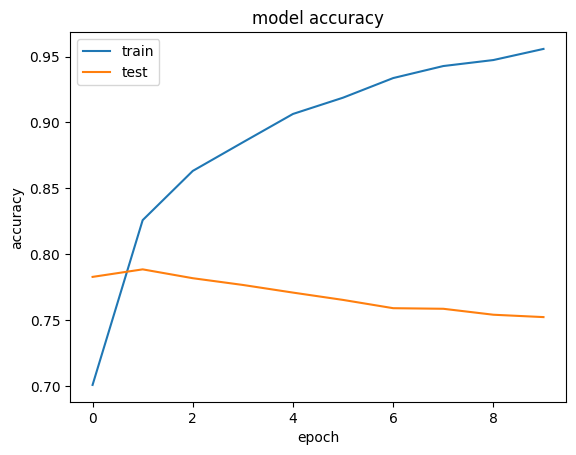

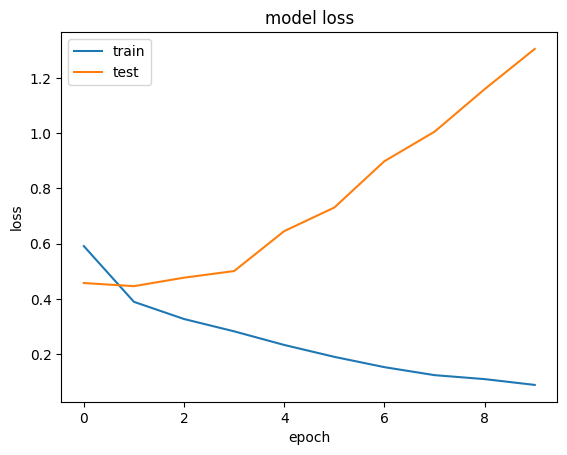

In [91]:
plot_history(history)

In [92]:
y_pred=model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


In [94]:
y_pred[560]

array([0.], dtype=float32)

In [93]:
y_pred = np.round(y_pred, 0)

In [95]:
y_pred = y_pred.ravel()
y_pred.shape

(25000,)

In [96]:
y_pred = y_pred.astype('int64')

In [97]:
y_test.ravel()
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [98]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.22%


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     12500
           1       0.75      0.76      0.75     12500

    accuracy                           0.75     25000
   macro avg       0.75      0.75      0.75     25000
weighted avg       0.75      0.75      0.75     25000



In [64]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

6. Use the designed model to print the prediction on any one sample.

In [102]:
y_pred_1=model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


In [105]:
decoded_review_final = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_test[1]])
decoded_review_final

'even this worthy ? scene br just return young a ? ? boring local no kind poorly films career mexico'

We can see below that y_test[1] and y_pred[1] both are one for x_test[1], expected matching the actual

In [106]:
y_test[1]

1

In [107]:
y_pred[1]

1

We can see below that y_test[258] and y_pred[258] both are one for x_test[258], expected matching the actual

In [109]:
decoded_review_final = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_test[258]])
decoded_review_final

"original fairly ? days post opinion memorable it's enjoyable actual started financial films was has far hours hour didn't happens"

In [110]:
y_test[258]

1

In [111]:
y_pred[258]

1

We can see below that y_test[18000] and y_pred[18000] both are one for x_test[18000], expected matching the actual

In [112]:
decoded_review_final = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_test[18000]])
decoded_review_final

"rip only least day friends his i ? sometimes it such wasn't talk same ? ? all turned horror both"

In [113]:
y_test[18000]

0

In [114]:
y_pred[18000]

0

PART B : Social media analytics: PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the customer
sentiments

1. Read and explore the data

In [75]:
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines= True)

In [76]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [77]:
df.shape

(28619, 3)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [79]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

Data is balanced for sarcastic and legitimate news

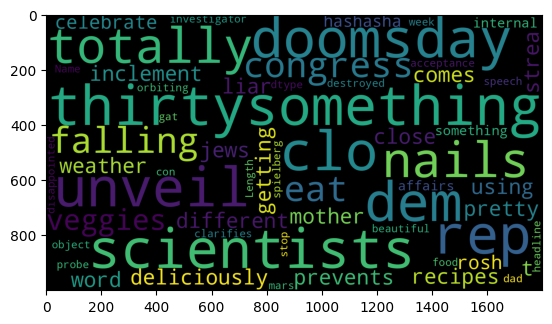

In [80]:
wordcloud = WordCloud(background_color='black', stopwords=STOPWORDS, max_words=100, random_state=101, width = 1800, height=1000)
wordcloud.generate(str(df['headline']))
plt.imshow(wordcloud)

2. Retain relevant columns

In [81]:
#df = df.copy()

# Drop article_link column
df=df.drop(['article_link'], axis=1)

3. Get length of each sentence

In [82]:
df['headline_len'] = df.headline.apply(lambda x: len(x.split()))

In [83]:
df.head(5)

,is_sarcastic,headline,headline_len
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


In [84]:
sarcastic = df[df.is_sarcastic == 1]
legit = df[df.is_sarcastic == 0]

<ipython-input-85-c72ecbb02971>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sarcastic.headline_len, hist= True, label= 'Sarcastic')
<ipython-input-85-c72ecbb02971>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(legit.headline_len, hist= True, label= 'legitimate')


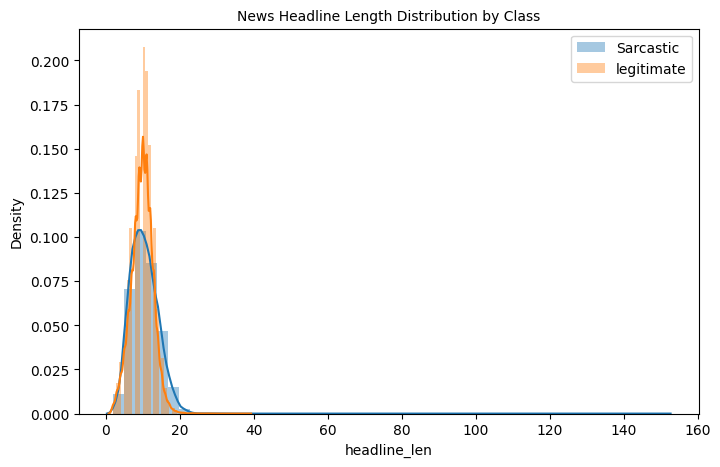

In [85]:
plt.figure(figsize=(8,5))
sns.distplot(sarcastic.headline_len, hist= True, label= 'Sarcastic')
sns.distplot(legit.headline_len, hist= True, label= 'legitimate')
plt.legend()
plt.title('News Headline Length Distribution by Class', fontsize = 10)
plt.show()

Cleaning the text

In [86]:
lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
punctuations = string.punctuation

In [87]:
def clean_text(text):
    """
    This function receives headlines sentence and returns clean sentence
    """
    text = text.lower()
    text = re.sub("\\n", "", text)

    #Split the sentences into words
    words = list(text.split())

    words = [lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if w not in punctuations]
    words = [w for w in words if w not in stop_words]
    #words = [''.join(x for x in w if x.isalpha()) for w in words]

    clean_sen = " ".join(words)

    return clean_sen

In [88]:
df['news_headline'] = df.headline.apply(lambda text: clean_text(text))
df.head()

,is_sarcastic,headline,headline_len,news_headline
0,1,thirtysomething scientists unveil doomsday clo...,8,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,13,dem rep. totally nail congress fall short gend...
2,0,eat your veggies: 9 deliciously different recipes,7,eat veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,8,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,9,mother come pretty close use word 'streaming' ...


4. Define parameters



max_features: Number of words to take from tokenizer - this has been set to 10000
maxlen: Maximum length of each sentence - max_seq_length is computed here by going through each headline and then computing headline with max size
embedding_size: Size of embedding vector - has been considered as 100 before commencing modelling


In [89]:
def get_sequences(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)

    if train == True:
        max_seq_length = np.max(list(map(len, sequences)))

    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_seq_length, padding='post')

    return sequences

5. Get indices for words
6. Create features and labels
7. Get vocabulary size

In [99]:
max_words = 10000

def preprocess_inputs(df):

    # Split df into X and y
    y = df['is_sarcastic']
    X = df['news_headline']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

    # Create and fit tokenizer
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X_train)

    word_index = tokenizer.word_index
    print("unique tokens count", len(word_index))

    vocab_length = len(tokenizer.word_index) + 1
    print("Vocab length:", vocab_length)

    # Get sequence data
    X_train = get_sequences(texts=X_train, tokenizer=tokenizer, train=True)
    X_test = get_sequences(texts=X_test, tokenizer=tokenizer, train=False, max_seq_length=X_train.shape[1])

    max_sequence_length = X_train.shape[1]
    print("Sequence length:", max_sequence_length)

    return X_train, X_test, y_train, y_test

In [100]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

unique tokens count 24119
Vocab length: 24120
Sequence length: 98


In [101]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

X train shape (22895, 98)
X test shape (5724, 98)
y train shape: (22895,)
y test shape: (5724,)


In [94]:
X_train

array([[ 210, 8355,  715, ...,    0,    0,    0],
       [6519, 8356,  531, ...,    0,    0,    0],
       [ 558,   66,  135, ...,    0,    0,    0],
       ...,
       [ 269,  907,  346, ...,    0,    0,    0],
       [1544,  349,  255, ...,    0,    0,    0],
       [  20, 1076, 1873, ...,    0,    0,    0]], dtype=int32)

In [95]:
y_train

22209    1
17244    0
2360     1
3414     1
24523    0
        ..
10955    0
17289    1
5192     0
12172    0
235      1
Name: is_sarcastic, Length: 22895, dtype: int64

In [96]:
y_train.value_counts()

0    11994
1    10901
Name: is_sarcastic, dtype: int64

8. Create a weight matrix using GloVe embeddings

In [97]:
import gensim
import gensim.downloader as api


In [111]:
glove_model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [112]:
embedding_dim = 100
embedding_vector = []

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if word in glove_model:
    embedding_vector = glove_model[word]
  else:
    embedding_vector = None

  if i<max_words:
   if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

9. Define and compile a LSTM model

In [114]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_bidir = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=98),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidir.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 98, 100)           1000000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 98, 64)            34048     
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

10. Fit the model and check the validation accuracy

In [115]:
model_bidir.layers[0].set_weights([embedding_matrix])
model_bidir.layers[0].trainable = False

In [116]:
history_bidir = model_bidir.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/10
716/716 [==============================] - 50s 65ms/step - loss: 0.5759 - accuracy: 0.6850 - val_loss: 0.4695 - val_accuracy: 0.7738 - lr: 0.0010
Epoch 2/10
716/716 [==============================] - 44s 61ms/step - loss: 0.3812 - accuracy: 0.8333 - val_loss: 0.4408 - val_accuracy: 0.7965 - lr: 0.0010
Epoch 3/10
716/716 [==============================] - 44s 61ms/step - loss: 0.2747 - accuracy: 0.8864 - val_loss: 0.4654 - val_accuracy: 0.7982 - lr: 0.0010
Epoch 4/10
716/716 [==============================] - 45s 62ms/step - loss: 0.2056 - accuracy: 0.9199 - val_loss: 0.5292 - val_accuracy: 0.7870 - lr: 0.0010
Epoch 5/10
716/716 [==============================] - 44s 61ms/step - loss: 0.1230 - accuracy: 0.9569 - val_loss: 0.6236 - val_accuracy: 0.7891 - lr: 1.0000e-04
Epoch 6/10
716/716 [==============================] - 50s 69ms/step - loss: 0.1095 - accuracy: 0.9613 - val_loss: 0.6594 - val_accuracy: 0.7888 - lr: 1.0000e-04
Epoch 7/10
716/716 [==============================

179/179 [==============================] - 3s 15ms/step - loss: 0.6755 - accuracy: 0.7877
Test Loss:  0.6754536628723145
Test Accuracy 0.7877358198165894
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


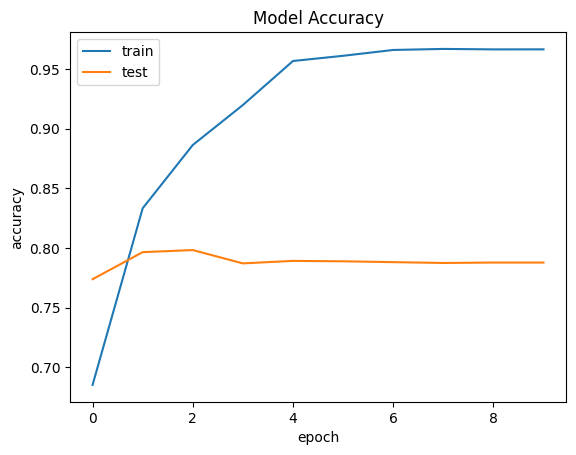

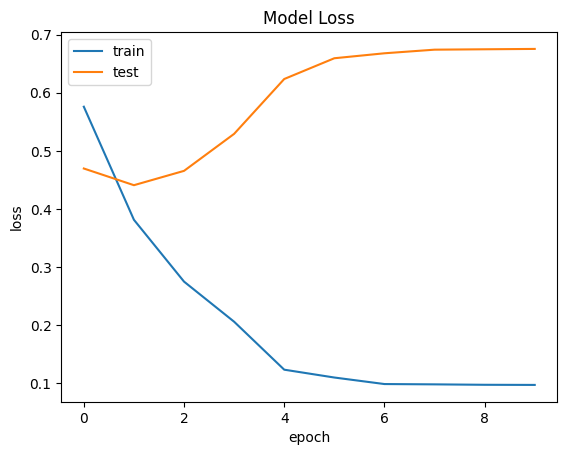

In [117]:
score = model_bidir.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_bidir.history.keys())
# summarize history for accuracy
plt.plot(history_bidir.history['accuracy'])
plt.plot(history_bidir.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bidir.history['loss'])
plt.plot(history_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

179/179 [==============================] - 3s 13ms/step


<ipython-input-118-d3d5bb88f600>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze(model_bidir.predict(X_test) >= 0.5).astype(np.int)


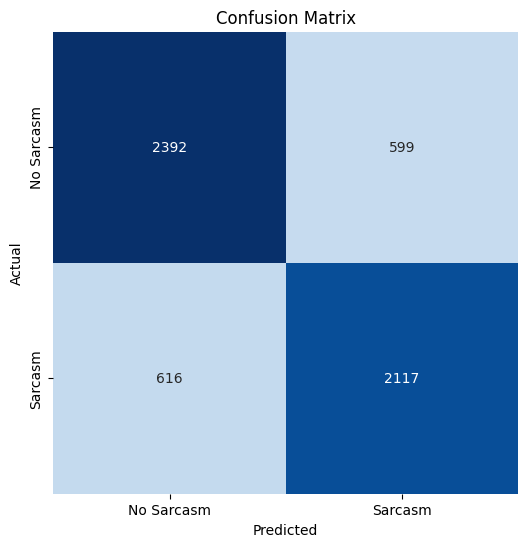

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Sarcasm       0.80      0.80      0.80      2991
     Sarcasm       0.78      0.77      0.78      2733

    accuracy                           0.79      5724
   macro avg       0.79      0.79      0.79      5724
weighted avg       0.79      0.79      0.79      5724



In [118]:
y_pred = np.squeeze(model_bidir.predict(X_test) >= 0.5).astype(np.int)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names=["No Sarcasm", "Sarcasm"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["No Sarcasm", "Sarcasm"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Sarcasm", "Sarcasm"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)